<a href="https://colab.research.google.com/github/maushamkumar/PyTorch/blob/main/01_Pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Workflow

Let's explore an example PyTorch end-to-end workflow.

In [28]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3: "fitting the model to data (training)",
                      4: "making predictions and evaluating a model (inference)",
                      5: "saving and loading a model",
                      6: "Putting it all together"}

In [29]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# check PyTorch version
torch.__version__

'2.2.1+cu121'

## Data (preparing and loading)

Data can be almost anything... in machine learning

* Excel speadsheet
* Images of any kind
* Videos (YouTube has lots of data...)
* Audio like songs or podcasts
* CSV
* DNA
* Text

Machine learning is a game of two parts
1. Get data into a numerical representation
2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some *Known* data using the linear regression formula.


we'll use a linear regression formula to make a straight line with *Known*  **Parameters**

In [30]:
# create *known* parameters
weight = 0.7
bias = 0.3

In [31]:
# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1) # Uppercase represent a tensor lower case represents vector or matrix but for now this represent vector
y = weight * X + bias


In [32]:
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [33]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets (one of the most important steps in machine and Deep learning in general)

#### Let's create a training and test set with our data.

In [34]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [35]:
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize this data?

This is where the data explorer's motto comes in to play

"Visualize, visualize, visualize"

In [36]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  #plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # plot test data in green
  plt.scatter(test_data, test_labels, c="y", s=4, label="Test data")

  # Are there predictions?
  if predictions is not None:
    # plot the prediction if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14})

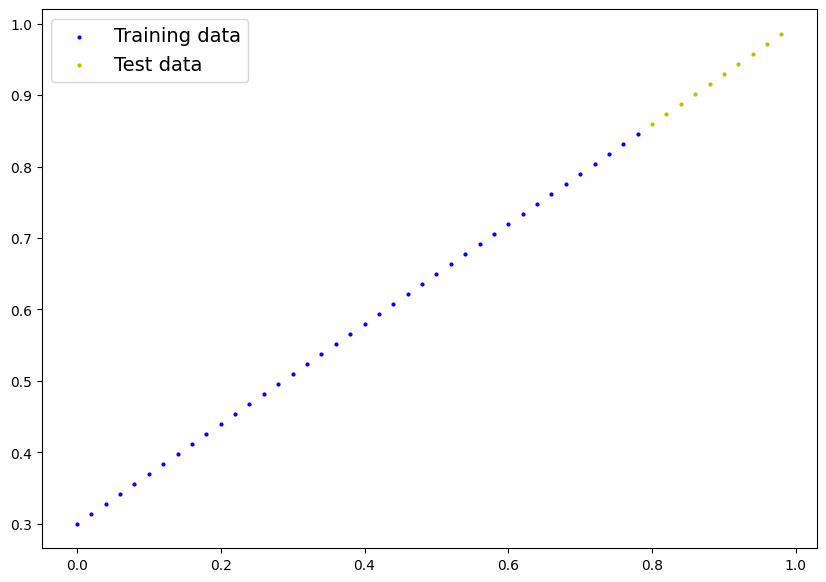

In [37]:
plot_predictions()

## Creating our first PyTorch model for linear regression

What our model does:
* Start with random values (weights & bias)
* Look at training data and adjust the random values to better represent (or get closer to ) the ideal values (the weight & bias values we used to create the data )

How does it do so?
1. Gradient descent
2. Backpropagation
3. Loss function
4. Accuracy

In [67]:
# Create linear regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think "model" in Keras)
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, # <- start with a random weight and try to adjust it to the ideal weight
                                            requires_grad=True, # <- Can this parameter be updated via gradient descent?
                                            dtype=torch.float)) # <- PyTorch loves the datatype torch.float32

    self.bias = nn.Parameter(torch.randn(1,  # <- start with a random bias and try to adjust it to the ideal bias
                                         requires_grad=True, # <- Can this parameter be updated via gradient descent?
                                         dtype=torch.float)) # <- PyTorch loves the datatype torch.float32

    # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
      return self.weights * x + self.bias # This is the linear regression formula


### Breaking down what's happening in our PyTorch linear regression model

### PyTorch model building essentials

* **torch.nn** - contains all of the building blocks for computational graphs(another word for neural networks)

* **torch.nn.Parameter** - what parameters should our model try and learn, often a PyTorch layer from troch.nn will set these for use

* **torch.nn.module** - The base class for all neural network modules, if you subclass it, you should overwrite forward ()
* **torch.optim** - this where the optimizers in pytorch live, they will help with gradent descent
* def Forward() - All nn.module subclasses requires you to overwrite forward(), this method defines what happens in the forward computation of the neural network

### Checking out the internals of our PyTorch model

#### Checking the content of our PyTorch model

Now we've created a model, let's see what's inside.....

So, we can check out model parameters or what's inside our model using. Parameters()

In [71]:
# Create a random seed
torch.manual_seed(42)

In [73]:
# Create an instance of the model (this is a subclass of nn.Module)
model = LinearRegressionModel()

list(model.parameters())

[Parameter containing:
 tensor([0.2345], requires_grad=True),
 Parameter containing:
 tensor([0.2303], requires_grad=True)]

In [68]:
model.state_dict()

OrderedDict([('weights', tensor([0.3445])), ('bias', tensor([0.1488]))])

In [41]:
model

LinearRegressionModel()

In [42]:
# Check our the parameters
model.parameters()

<generator object Module.parameters at 0x79beadeeedc0>

In [43]:
list(model.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [44]:
torch.randn(1)

tensor([0.2345])

In [45]:
torch.randn(1)

tensor([0.2303])

In [46]:
torch.randn(3)

tensor([-1.1229, -0.1863,  2.2082])

In [47]:
torch.randn(3)

tensor([-0.6380,  0.4617,  0.2674])

In [74]:
# List named parameters
model.state_dict()

OrderedDict([('weights', tensor([0.2345])), ('bias', tensor([0.2303]))])

In [49]:
weight, bias

(0.7, 0.3)

### Making Predictions with our random model using torch.inference_mode()


To check our model's predictive power, let's see how well it predicts y_test based on x_test.

When we pass data through our model, it's going to run it through the forward() method

In [50]:
X_test

tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

In [75]:
y_preds = model(X_test)
y_preds

tensor([[0.4179],
        [0.4226],
        [0.4273],
        [0.4320],
        [0.4367],
        [0.4413],
        [0.4460],
        [0.4507],
        [0.4554],
        [0.4601]], grad_fn=<AddBackward0>)

In [76]:
# Make predictions with model
with torch.inference_mode():
  y_preds = model(X_test)

y_preds

tensor([[0.4179],
        [0.4226],
        [0.4273],
        [0.4320],
        [0.4367],
        [0.4413],
        [0.4460],
        [0.4507],
        [0.4554],
        [0.4601]])

In [77]:
# you can also do somothing with torch,no_grad(), however, torch.inference_mode () is preferred
with torch.no_grad():
  y_preds = model(X_test)

y_preds

tensor([[0.4179],
        [0.4226],
        [0.4273],
        [0.4320],
        [0.4367],
        [0.4413],
        [0.4460],
        [0.4507],
        [0.4554],
        [0.4601]])

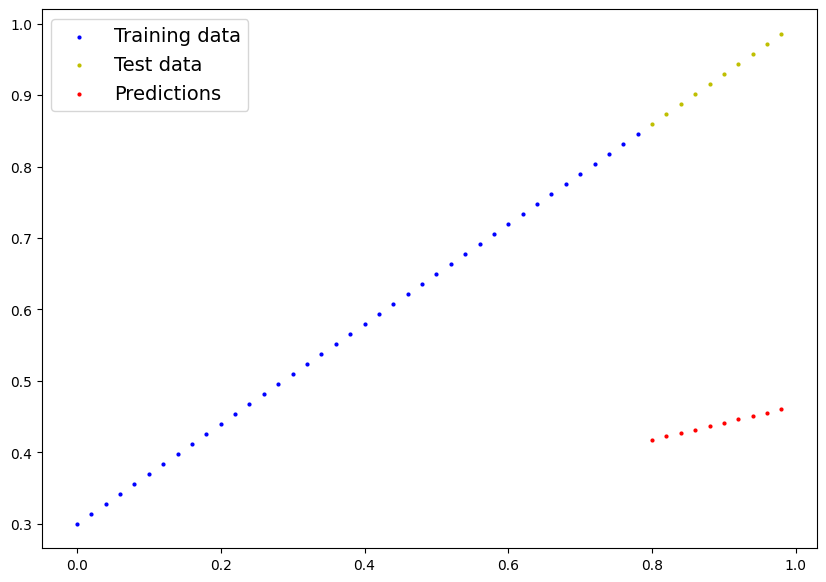

In [90]:
plot_predictions(predictions=y_preds)

inference mode Twitter


## Train model

The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some *known* parameters

or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your model predictions are is to use a loss function(another word cost function)

* Note: Loss function may also be called cost function or criterion in different area. For our case, we're going to refer to it as a loss function.

Things we need to train:
* **Loss Function:** A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.

* **Optimizer:** Takes into account the loss function and adjusts the model's parameters (e.g. weights and biases) to improve the loss function.

And specifically for PyTorch , we need:
* A training loop
* A testing loop

In [55]:
list(model.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [56]:
model.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Setting up a loss function and optimizer with PyTorch

In [78]:
# Setup a loss function
loss_fn = nn.L1Loss()

# setup an optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [58]:
loss_fn

L1Loss()

*Q* which loss function and optimizer should i use?

*A:* This will be problem-specific, But with experience, you'll get an idea of what works and what doesn't with particular model.

For example, for a regression problem (like ours), a loss function of nn.L1Loss
and an optimizer like torch.optim.SGD() will suffice.

But for a classification problem like classifying whether a photo is of a dog or a cat, you'll likely want to use a loss function of nn.BECLoss (binary cross entropy).

### Building a training loop(and a testing loop) in PyTorch

A couple of things we need in a traning loop:

0. Loop through the data
1. Forward pass (this involves data moving through our model's forward() functions) to make prediction on data- also called Forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backward through  the network to calculate the gradient of each of the parameters of our model with respect to the loss(**backpropagation**)
5. optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)

In [61]:
list(model.eval().parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [62]:
with torch.no_grad():
  list(model.parameters())

In [60]:
list(model.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [101]:
torch.manual_seed(42)

# An epoch is one loop through the data... (this is a hyperparameter because we've set it ourselves)
epochs = 100

# Training
# 0. Loop through the data
for epoch in range(epochs):
  # set the model to training mode
  model.train() # train mode i PyTorch set all parameters the required gradient to require gradients

  # 1. Forward pass
  y_pred  = model(X_train)

  # 2. Calculate loss
  loss = loss_fn(y_pred, y_train)
  print(f"Loss: {loss}")

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will accumulate through the loop so... we have to zero them above in step 3 for the next iteration of the loop

  ### Testing
  model.eval() # turns off gradient tracking

  # Print out model state_dict()
  print(model.state_dict())

Loss: 0.10522427409887314
OrderedDict([('weights', tensor([0.2994])), ('bias', tensor([0.3743]))])
Loss: 0.10105693340301514
OrderedDict([('weights', tensor([0.3028])), ('bias', tensor([0.3793]))])
Loss: 0.09736667573451996
OrderedDict([('weights', tensor([0.3063])), ('bias', tensor([0.3843]))])
Loss: 0.09395559877157211
OrderedDict([('weights', tensor([0.3096])), ('bias', tensor([0.3888]))])
Loss: 0.09095562994480133
OrderedDict([('weights', tensor([0.3128])), ('bias', tensor([0.3928]))])
Loss: 0.08830587565898895
OrderedDict([('weights', tensor([0.3161])), ('bias', tensor([0.3968]))])
Loss: 0.0858907550573349
OrderedDict([('weights', tensor([0.3192])), ('bias', tensor([0.4003]))])
Loss: 0.08375857770442963
OrderedDict([('weights', tensor([0.3222])), ('bias', tensor([0.4033]))])
Loss: 0.08196456730365753
OrderedDict([('weights', tensor([0.3252])), ('bias', tensor([0.4063]))])
Loss: 0.08023977279663086
OrderedDict([('weights', tensor([0.3280])), ('bias', tensor([0.4088]))])
Loss: 0.078

In [88]:
model.state_dict()

OrderedDict([('weights', tensor([0.2540])), ('bias', tensor([0.2803]))])

In [81]:
weight, bias

(0.7, 0.3)

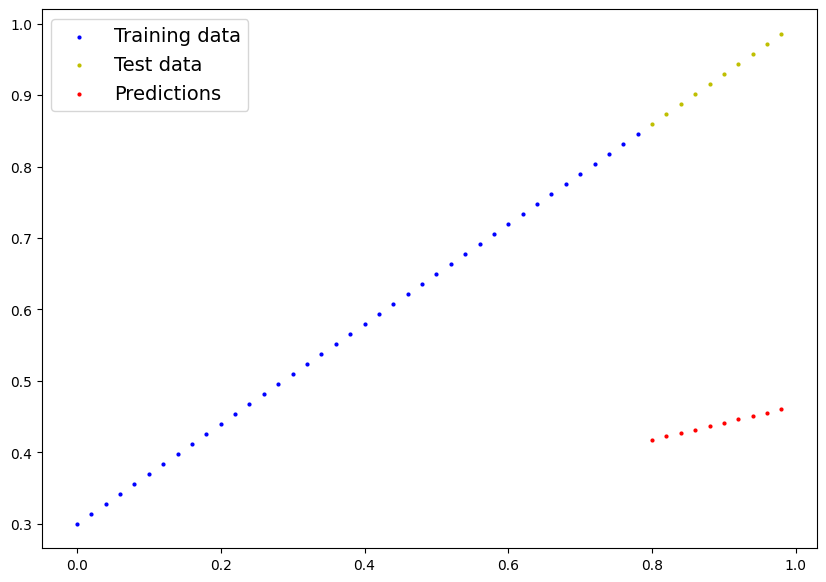

In [102]:
plot_predictions(predictions=y_preds)

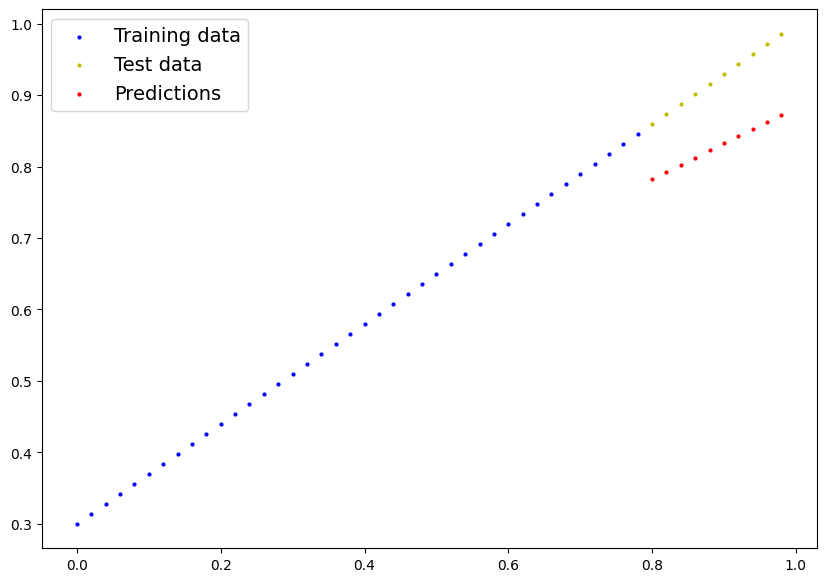

In [103]:
with torch.inference_mode():
  y_preds_new = model(X_test)

plot_predictions(predictions=y_preds_new)